In [23]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_forward2
import seis_test
import seis_prior
#plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

capturing graph
capturing graph
capturing graph
Mismatch to hosts: 3.5444538831673834e-05
adjoint 1.0550642390999565e-17 4.904263242783745e-05
diff 1.5727204184213184e-13 1.6588860071825717e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 7.399679827213568e-18 0.0001352831488805375
diff 1.1763480308715764e-13 1.4481413610833205e-07
False False
(4901, 4901)
prior test 5.1530030056312626e-06 10.306629681028426
prior test 1.123679396601053e-13 1.4104176818463543e-05
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!
CPU times: total: 2.36 s
Wall time: 2.51 s


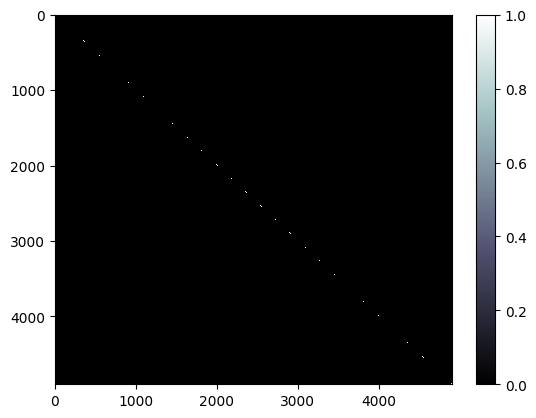

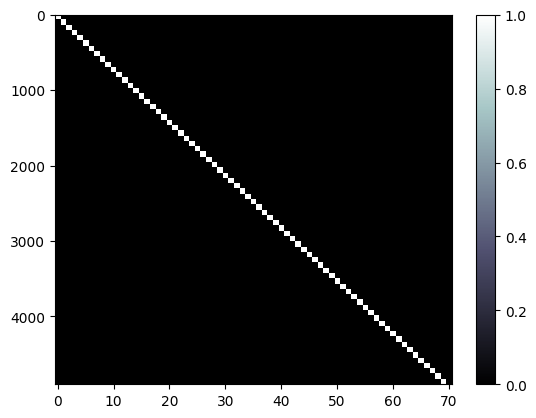

In [24]:
%%time
importlib.reload(kgs)
importlib.reload(seis_test)
importlib.reload(seis_forward2)
importlib.reload(seis_prior)
seis_test.run_all_tests(test_reference_mode=True)


In [ ]:
import cupy as cp
import time
importlib.reload(seis_forward2)

d = kgs.load_all_train_data()[0]
d.load_to_memory()    
vec = d.velocity.to_vector()
d2 = kgs.load_all_train_data()[1]
d2.load_to_memory()    
vec2 = d2.velocity.to_vector()

kgs.profiling=False
seis_forward2.profiling=True
result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec, vec_diff = cp.zeros((4901,1)), vec_adjoint = cp.zeros((5*999*70,1)))#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
print(kgs.rms(result - d.seismogram.to_vector()))
seis_forward2.reset_profile()
t=time.time()
NN=40
for ii in range(NN):
    result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec, vec_diff = cp.zeros((4901,1)), vec_adjoint = cp.zeros((5*999*70,1)))#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
print((time.time()-t)/(NN))
seis_forward2.show_profile(NN)

capturing graph
capturing graph
capturing graph
3.274694026346925e-05
